# Analysis of Air Quality in India

This project aims at looking at a dataset of air-quality, visualizing it and finding some inferences from it. The data set used in this this project was downloaded from [Kaggle.com](https://www.kaggle.com/shrutibhargava94/india-air-quality-data).

Python libraries used for this project are
- Pandas        (for reading, parsing and aggregating data)
- NumPy         (for mathematical computation)
- Matplotlib    (for visualizing data)
- Seaborn       (for visualizing data)
- Jovian        (for saving the notebook to [Jovian.ml](https://jovian.ml))
- Urllib        (for downloading the dataset)
- Zipfile       (for extracting zip file)

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [ ]:
import jovian

In [ ]:
project_name = "analysis-of-air-quality-in-india"
file_name = "main.ipynb"

In [ ]:
def save():
    jovian.commit(project=project_name, filename=file_name, environment='pip', privacy='secret')

## Data Preparation and Cleaning

Now, we will download and read the dataset.

The dataset is stored in compressed file format to reduce bandwidth usage. First, we will download the compressed file using `urllib` module.

In [3]:
import urllib

In [6]:
archive_url = 'https://github.com/amanpalariya/air-quality-analysis/raw/master/data.zip'
archive_file_name = 'data.zip'

In [8]:
urllib.request.urlretrieve(archive_url, filename=archive_file_name)

('data.zip', <http.client.HTTPMessage at 0x264a27d34c0>)

The compressed file contains the `.csv` file. Now, we will extract the compressed file using `zipfile` module.

In [10]:
from zipfile import ZipFile

In [11]:
with ZipFile(archive_file_name) as zip_file:
    zip_file.extractall()

It's time to read the `.csv` file now. Here we begin by importing `pandas` library.

In [1]:
import pandas as pd

In [2]:
air_quality_df = pd.read_csv('data.csv', encoding='latin')

In [3]:
air_quality_df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will remove fields which have no information about the air-quality.

In [4]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

After looking at the info, we see than no column except `state` has all non-null values. Look at the `pm2_5` column, it has only **9314** non-null values out of **435742** entires. Let us see how many null values does each column has.

In [5]:
air_quality_df.isnull().sum().sort_values(ascending = False)

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
location                            3
sampling_date                       3
state                               0
dtype: int64

We will remove `pm2_5` column because there are so many null values.

In [3]:
air_quality_df.drop(columns='pm2_5', inplace=True)

`sampling_date` is a redundant column in the data frame, so we will remove it.

In [4]:
air_quality_df.drop(columns='sampling_date', inplace=True)

Now let us look at the `type` field more closely.

In [8]:
air_quality_df.type.value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

There are different values for same `type`, so we will sanitize this column.

Note: RIRuO stands for Residential/Industrial/Rural/Other.

In [5]:
air_quality_df.loc[(air_quality_df.type == 'Residential, Rural and other Areas'), 'type'] = 'Residential'
air_quality_df.loc[(air_quality_df.type == 'Residential and others'), 'type'] = 'Residential'
air_quality_df.loc[(air_quality_df.type == 'Industrial Area'), 'type'] = 'Industrial'
air_quality_df.loc[(air_quality_df.type == 'Industrial Areas'), 'type'] = 'Industrial'
air_quality_df.loc[(air_quality_df.type == 'Sensitive Area'), 'type'] = 'Sensitive'
air_quality_df.loc[(air_quality_df.type == 'Sensitive Areas'), 'type'] = 'Sensitive'
air_quality_df.loc[(air_quality_df.type == 'RIRUO'), 'type'] = 'Mixed'


In [10]:
air_quality_df.type.value_counts()

Residential    265963
Industrial     148071
Sensitive       15011
Mixed            1304
Name: type, dtype: int64

Lets conver the `date` column to proper date so that we can use it for visuvalization later.

In [34]:
air_quality_df['date'] = pd.to_datetime(air_quality_df['date'])
air_quality_df['year'] = pd.DatetimeIndex(air_quality_df.date).year
air_quality_df['month'] = pd.DatetimeIndex(air_quality_df.date).month
air_quality_df['day'] = pd.DatetimeIndex(air_quality_df.date).day

In [12]:
save()

'' was not found in history, as a file, url, nor in the user namespace.


## Exploratory Analysis and Visualization

Now we will analyse the dataset in order to find some useful information.

Before we begin, lets understand what are the different technical columns in the data frame.
- `so2` - SO<sub>2</sub> is a mildly-toxic gas. It is the major pollutant in air.
- `no2` - NO<sub>2</sub> is a reddish-brown gas that causes respiratory problems and eye irrtation.
- `spm` - SPM stands for _Suspended Particulate Matter_. It refers to the microscopic particles (solid/liquid) present in the air. e.g. dust
- `rspm` - RSPM or _Respirable SPM_ are the SPM that are directly inhaled by humans.

Some other interesting terms
- **Fine Particles (PM<sub>10</sub>)** - These are the particulate matters whose size is less that _10 microns_.
- **Ultrafine Particles (PM<sub>2.5</sub>)** - These are the particulate matters whose size is less that _2.5 microns_.

Note: These values are measured in _μg/m<sup>3</sup>_

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20, 8)

Let's first plot some graphs state-wise.

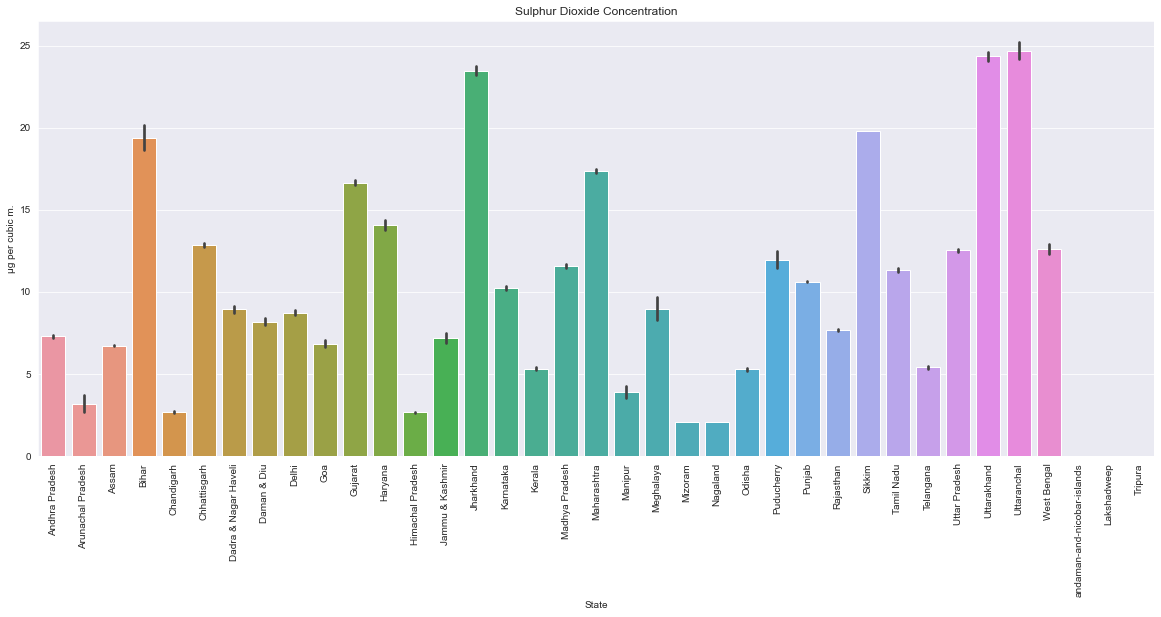

In [94]:
sns.barplot('state', 'so2', data=air_quality_df, hue=None);
plt.xticks(rotation= 90);
plt.xlabel("State");
plt.ylabel("μg per cubic m.");
plt.title("Sulphur Dioxide Concentration");

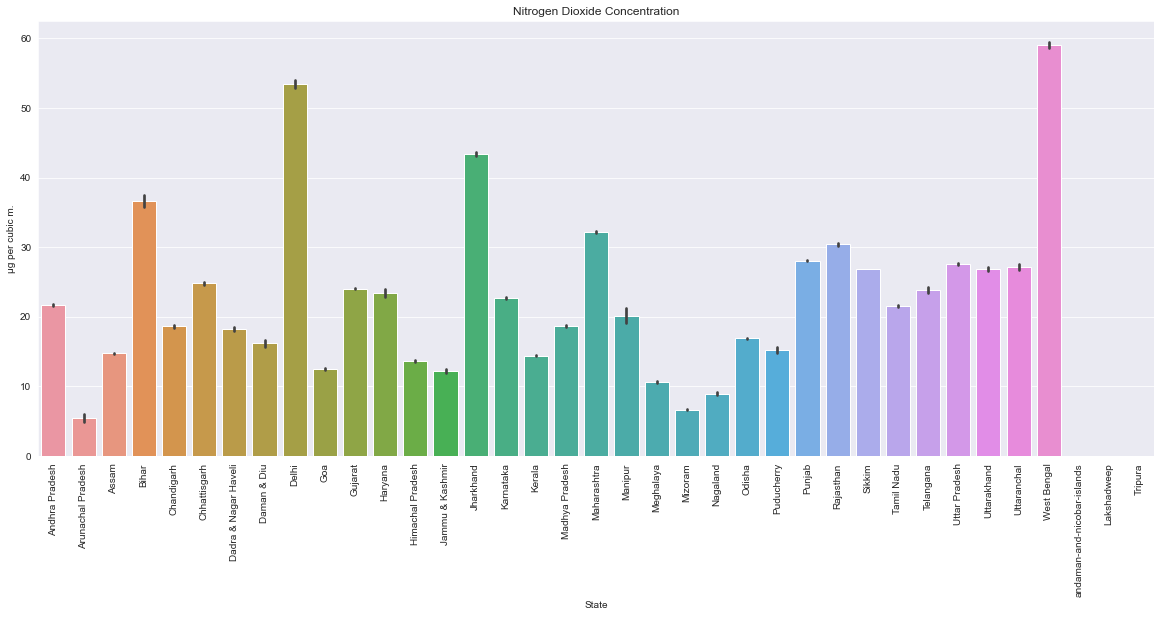

In [95]:
sns.barplot('state', 'no2', data=air_quality_df, hue=None);
plt.xticks(rotation= 90);
plt.xlabel("State");
plt.ylabel("μg per cubic m.");
plt.title("Nitrogen Dioxide Concentration");

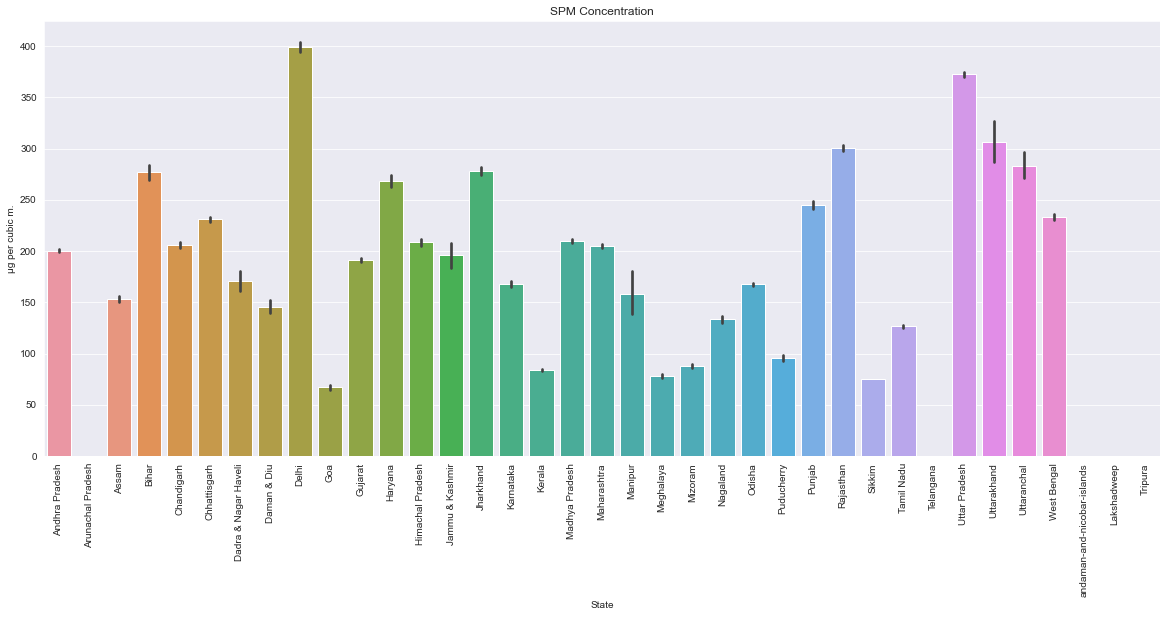

In [100]:
sns.barplot('state', 'spm', data=air_quality_df, hue=None);
plt.xticks(rotation= 90);
plt.xlabel("State");
plt.ylabel("μg per cubic m.");
plt.title("SPM Concentration");

In the above three graphs, we have seem that **Mizoram**, **Meghalaya** and **Arunachal Pradesh** are of the very best states in terms of air-quality. There three states belong to the north-eastern part of India.

**Delhi** has very high amount of NO<sub>2</sub> and dust in the atmosphere. However, the SO<sub>2</sub> concentration in Delhi is not much.

In [110]:
years = air_quality_df.groupby('year')['year'].mean()
spm_data = air_quality_df.groupby('year')['spm'].mean()
no2_data = air_quality_df.groupby('year')['no2'].mean()
so2_data = air_quality_df.groupby('year')['so2'].mean()

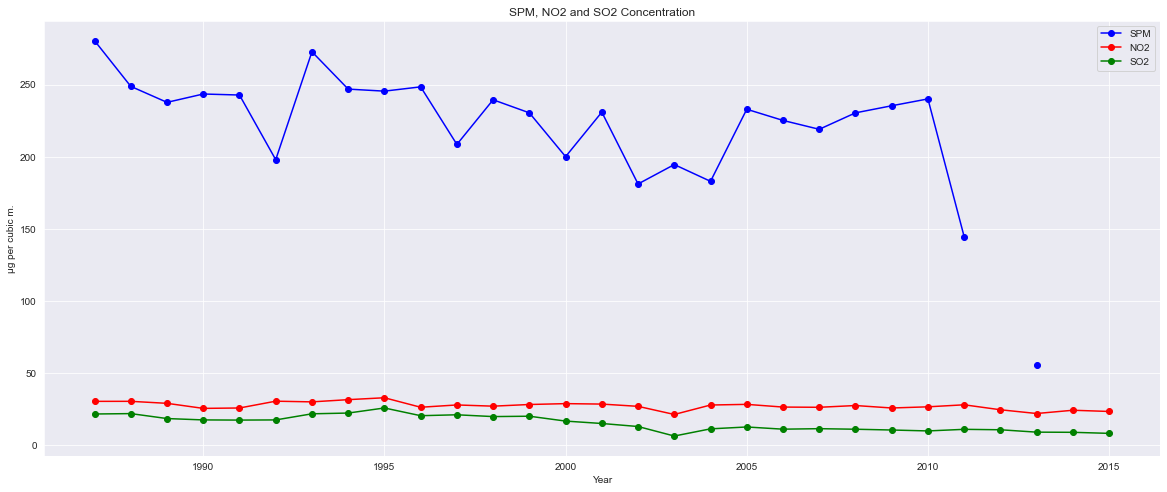

In [111]:
plt.plot(years, spm_data, 'b-o');
plt.plot(years, no2_data, 'r-o');
plt.plot(years, so2_data, 'g-o');
plt.legend(['SPM', 'NO2', 'SO2']);
plt.xlabel('Year');
plt.ylabel('μg per cubic m.');
plt.title('SPM, NO2 and SO2 Concentration');

In [112]:
months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
spm_data = air_quality_df.groupby('month')['spm'].mean()
no2_data = air_quality_df.groupby('month')['no2'].mean()
so2_data = air_quality_df.groupby('month')['so2'].mean()

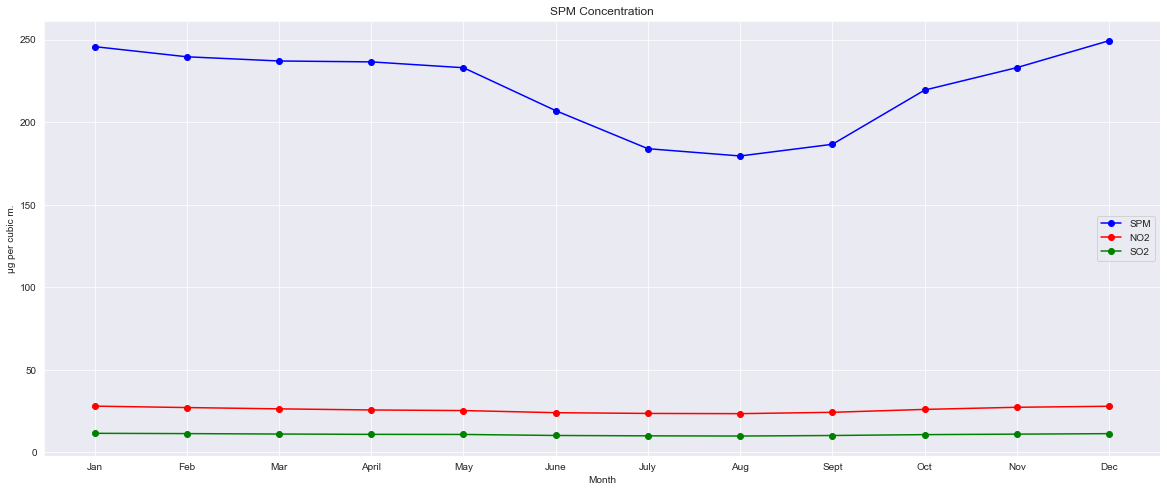

In [113]:
plt.plot(months, spm_data, 'b-o');
plt.plot(months, no2_data, 'r-o');
plt.plot(months, so2_data, 'g-o');
plt.legend(['SPM', 'NO2', 'SO2']);
plt.xlabel('Month');
plt.ylabel('μg per cubic m.');
plt.title('SPM Concentration');

This data shows that there is a decrease in suspend particles from June to August. August shows the minimum SPM concentration. It maybe because of monsoon season in India during this time.

We can see that there is no noticable pattern during **Diwali**. So, **Diwali** cannot be blamed for adding to the SPMs.

In [114]:
areas = ['Residential', 'Industrial']
years = air_quality_df.groupby('year')['year'].mean()
spm_data_residential = air_quality_df[air_quality_df.type==areas[0]].groupby('year')['spm'].mean()
spm_data_industrial = air_quality_df[air_quality_df.type==areas[1]].groupby('year')['spm'].mean()

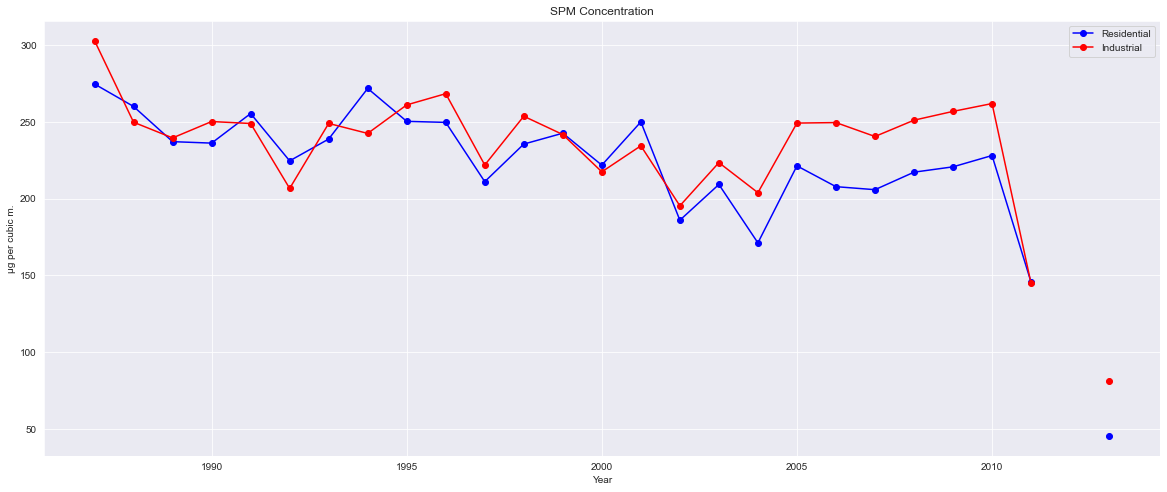

In [115]:
plt.plot(years, spm_data_residential, 'b-o');
plt.plot(years, spm_data_industrial, 'r-o');
plt.legend(areas);
plt.xlabel('Year');
plt.ylabel('μg per cubic m.');
plt.title('SPM Concentration');

Both industrial and residential areas have similar air-quality.

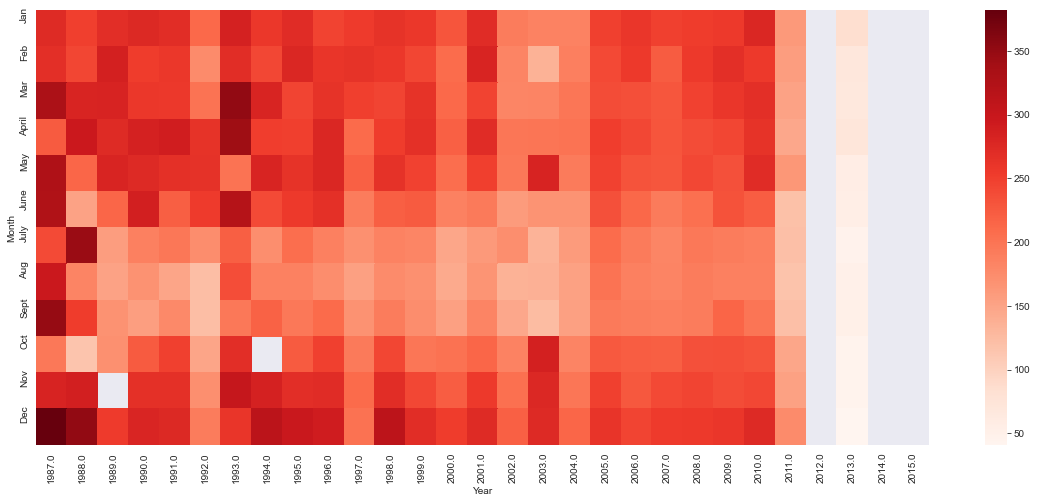

In [116]:
heat_map_data = air_quality_df.groupby(['year', 'month'])[['year', 'month', 'spm']].mean().pivot('month', 'year', 'spm')
sns.heatmap(heat_map_data, cmap='Reds');
plt.xlabel('Year');
plt.ylabel('Month');
plt.xticks(rotation=90);
plt.yticks(ticks=list(range(12)) ,labels=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']);

Now we can clearly find out which in which month of which year was the SPM concentration very high/low. Thanks to heatmap.

Note: The data after the year 2011 looks very wrong or incomplete.

In [ ]:
save()


## Asking and Answering Questions

Let us answer some of the question on the basis of visuvalisations done above.


### 1. What has been the trend of SPM over the years?

  There is a minimal decline in the SPM concentration but it has not changed much.

### 2. How does the SPM concentration change throughout 1 year? What are the reasons?
SPM concentration hits its low during August. It may be because of rainfall due to monsoon in India.

### 3. What is the effect of different seasons on concentration of gases like NO<sub>2</sub> and SO<sub>2</sub>?
There is hardly any change in the concentration of these gases throughout the year. But there is a very minimal decrease in their concentration during August. These gases are responsible for acid rain.

### 4. Which areas have poor air quality - industrial or residential? Why?
Both type of areas seem to have equally poor air-quality. However, during years 2005 - 2010, industrial areas performed worse. Industrial areas have factories and manufacturing units which release pollutants while residential areas are also full of vehicles which emit gases and soot almost 24x7.

### 5. How much effect does the Indian festival 'Diwali' has on SPM concentration?
It can easily be seen from the graphs above that SPM concentration is high during winters due to presence of moisture. Since, there was not abrupt increase or peak in SPM concentration around November. Hence, we can say that Diwali does not affect the concentration much.

### 6. \[General\] What could be the a possible way to reduce pollution in residential areas?
Promoting renewable energy sources and electric vehicles will help very much in this matter because major source of pollution in cities are vehicle emitted pollutants.

In [ ]:
save()

## Inferences and Conclusion

In [ ]:
year = 2010

In [124]:
print(f"The average SPM concentration in India was around {air_quality_df[air_quality_df.year==year]['spm'].mean()} microgram per cubic meter in the year {year}.")

The average SPM concentration in India was around 240.1435341602151 microgram per cubic meter in the year 2010.


In [169]:
highest_spm_in_year = air_quality_df[air_quality_df.year == year].sort_values('spm', ascending=False).head(1)
state = list(highest_spm_in_year['state'])[0]
spm_value = list(highest_spm_in_year['spm'])[0]
print(f"In the year {year}, {state} recorded the highest SPM cocentration of {spm_value} microgram per cubic meter.")

In the year 2010, Rajasthan recorded the highest SPM cocentration of 2485.0 microgram per cubic meter.


In [170]:
lowest_spm_in_year = air_quality_df[air_quality_df.year == year].sort_values('spm', ascending=True).head(1)
state = list(lowest_spm_in_year['state'])[0]
spm_value = list(lowest_spm_in_year['spm'])[0]
print(f"In the year {year}, {state} recorded the lowest SPM cocentration of {spm_value} microgram per cubic meter.")

In the year 2010, Kerala recorded the lowest SPM cocentration of 17.49 microgram per cubic meter.


There have hardly been any improvement in the SPM concentration but be can see climate change happening all around the world. We must come together and use clean energy to save our planet from deteriorating.

In [ ]:
save()

## References and Future Work

The dataset for this project was downloaded from [Kaggle.com][kaggle.com]. The dataset can be found at [https://www.kaggle.com/shrutibhargava94/india-air-quality-data].

My heartiest gratitude to [Jovian.ml][jovian.ml] for their interesting course ([Zero to Pandas][https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas]). Also, their python library `jovian` was very useful for cloning and saving notebooks from [jovian.ml].

In [ ]:
save()